<a href="https://colab.research.google.com/github/ttjh1234/CSproject_SDA/blob/main/OpenPose_caffe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenPose Caffe

## OpenPose COCO Model

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# COCO에서 각 파트 번호, 선으로 연결될 POSE_PAIRS
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Reye": 14,
                "Leye": 15 ,"REar":16,"LEar":17}

POSE_PAIRS = [["Neck","RShoulder"], ["Neck","LShoulder"], ["RShoulder","RElbow"], ["RElbow","RWrist"], ["LShoulder","LElbow"], ["LElbow","LWrist"],
              ["Neck","RHip"], ["RHip","RKnee"], ["RKnee","RAnkle"], ["Neck","LHip"], ["LHip","LKnee"], ["LKnee","LAnkle"],
              ["Neck","Nose"], ["Nose","Reye"], ["Reye","REar"], ["Nose","Leye"], ["Leye","LEar"],
              ["RShoulder","LEar"], ["LShoulder","REar"] ]

In [ ]:
# 각 파일 path
protoFile = "./drive/MyDrive/OpenPose/pose_deploy_linevec.prototxt"
weightsFile = "./drive/MyDrive/OpenPose/pose_iter_440000.caffemodel"

In [ ]:
# 위의 path에 있는 network 불러오기
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [ ]:
# 이미지 읽어오기
image = cv2.imread("./drive/MyDrive/OpenPose/test_image2.jpg",cv2.IMREAD_COLOR)

In [ ]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
type(image)

numpy.ndarray

In [ ]:
image.shape

(320, 340, 3)

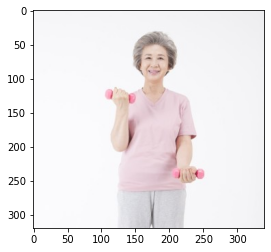

In [ ]:
plt.imshow(image)

In [ ]:
# frame.shape = 불러온 이미지에서 height, width, color 받아옴
imageHeight, imageWidth, _ = image.shape

In [ ]:
# network에 넣기위해 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)

In [ ]:
inpBlob

array([[[[0.9607844 , 0.9607844 , 0.9607844 , ..., 0.92549026,
          0.92549026, 0.92549026],
         [0.9607844 , 0.9607844 , 0.9607844 , ..., 0.92549026,
          0.92549026, 0.92549026],
         [0.96470594, 0.96470594, 0.96470594, ..., 0.9294118 ,
          0.9294118 , 0.9294118 ],
         ...,
         [0.9843138 , 0.9843138 , 0.9843138 , ..., 0.9450981 ,
          0.9450981 , 0.9450981 ],
         [0.9843138 , 0.9843138 , 0.9843138 , ..., 0.9450981 ,
          0.9450981 , 0.9450981 ],
         [0.9843138 , 0.9843138 , 0.9843138 , ..., 0.9450981 ,
          0.9450981 , 0.9450981 ]],

        [[0.9607844 , 0.9607844 , 0.9607844 , ..., 0.92549026,
          0.92549026, 0.92549026],
         [0.9607844 , 0.9607844 , 0.9607844 , ..., 0.92549026,
          0.92549026, 0.92549026],
         [0.96470594, 0.96470594, 0.96470594, ..., 0.9294118 ,
          0.9294118 , 0.9294118 ],
         ...,
         [0.9843138 , 0.9843138 , 0.9843138 , ..., 0.9450981 ,
          0.9450981 , 0.9

In [ ]:
inpBlob.shape

(1, 3, 320, 340)

In [ ]:
# network에 넣어주기
net.setInput(inpBlob)

In [ ]:
# 결과 받아오기
output = net.forward()

In [ ]:
type(output)

numpy.ndarray

In [ ]:
output.shape

(1, 57, 40, 43)

In [ ]:
# output.shape[1] = 이미지 ID, [2] = 출력 맵의 높이, [3] = 너비
H = output.shape[2]
W = output.shape[3]
print("이미지 ID : ", len(output[0]), ", H : ", output.shape[2], ", W : ",output.shape[3]) # 이미지 ID

이미지 ID :  57 , H :  40 , W :  43


In [ ]:
points = []
for i in range(0,18):
    # 해당 신체부위 신뢰도 얻음.
    probMap = output[0, i, :, :]
 
    # global 최대값 찾기
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H

    # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가, 검출했는데 부위가 없으면 None으로    
    if prob > 0.1 :    
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)       # circle(그릴곳, 원의 중심, 반지름, 색)
        cv2.putText(image, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else :
        points.append(None)

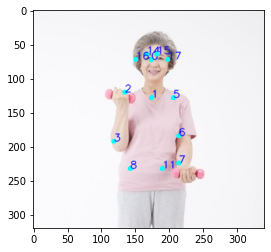

In [ ]:
plt.imshow(image)

In [ ]:
#cv2.imshow("Output-Keypoints",image)
#cv2.waitKey(0)

# 이미지 복사
imageCopy = image

# 각 POSE_PAIRS별로 선 그어줌 (머리 - 목, 목 - 왼쪽어깨, ...)
for pair in POSE_PAIRS:
    partA = pair[0]             # Head
    partA = BODY_PARTS[partA]   # 0
    partB = pair[1]             # Neck
    partB = BODY_PARTS[partB]   # 1
    
    #print(partA," 와 ", partB, " 연결\n")
    if points[partA] and points[partB]:
        cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)


#cv2.imshow("Output-Keypoints",imageCopy)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

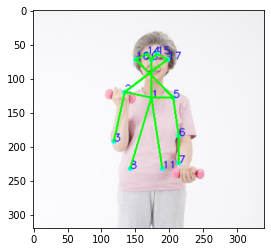

In [ ]:
plt.imshow(imageCopy)

COCO 모델을 사용하니까, 조금 더 사진 처리에 시간이 걸림을 알 수 있다.

예전 4초, 현재 7초.

## 비디오 처리 with COCO

In [ ]:
from scipy.spatial import distance as dist 
import numpy as np 
import pandas as pd 
import progressbar 
import cv2

In [ ]:
protoFile = "./drive/MyDrive/OpenPose/pose_deploy_linevec.prototxt"
weightsFile = "./drive/MyDrive/OpenPose/pose_iter_440000.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [ ]:
video = cv2.VideoCapture("./drive/MyDrive/OpenPose/A001_P001_G001_C001.mp4")
type(video)

cv2.VideoCapture

In [ ]:
ok, frame = video.read() 

In [ ]:
data=[]

Frame Size를 30으로 변환하는 작업을 효율적이게 하고 싶은데, 하는 방법을 아직 못찾음.

데이터 전처리를 해야 학습 모델에도 이용가능함.

처리 방법
1. 영상을 전부 불러서 파일제목을 라벨로 한다.
2. 영상을 30프레임씩만 가져와서 모델의 입력으로 사용한다.

In [ ]:
### 영상 한 개를 30프레임으로 자르는 작업 성공

video = cv2.VideoCapture("./drive/MyDrive/OpenPose/A001_P001_G001_C001.mp4")
count = 0

while (video.isOpened()):
    # read()는 grab()와 retrieve() 두 함수를 한 함수로 불러옴
    # 두 함수를 동시에 불러오는 이유는 프레임이 존재하지 않을 때
    # grab() 함수를 이용하여 return false 혹은 NULL 값을 넘겨 주기 때문
    ret, image = video.read()
    if ret != True: 
      break

    if (int(video.get(1)) % int(video.get(cv2.CAP_PROP_FRAME_COUNT)/30) == 0):
        print('Saved frame number : ' + str(int(video.get(1))))
        cv2.imwrite("./drive/MyDrive/OpenPose/test/%d.jpg" % count, image)
        print('Saved frame%d.jpg' % count)
        count += 1
    if count==30:
      break
video.release()

Saved frame number : 5
Saved frame0.jpg
Saved frame number : 10
Saved frame1.jpg
Saved frame number : 15
Saved frame2.jpg
Saved frame number : 20
Saved frame3.jpg
Saved frame number : 25
Saved frame4.jpg
Saved frame number : 30
Saved frame5.jpg
Saved frame number : 35
Saved frame6.jpg
Saved frame number : 40
Saved frame7.jpg
Saved frame number : 45
Saved frame8.jpg
Saved frame number : 50
Saved frame9.jpg
Saved frame number : 55
Saved frame10.jpg
Saved frame number : 60
Saved frame11.jpg
Saved frame number : 65
Saved frame12.jpg
Saved frame number : 70
Saved frame13.jpg
Saved frame number : 75
Saved frame14.jpg
Saved frame number : 80
Saved frame15.jpg
Saved frame number : 85
Saved frame16.jpg
Saved frame number : 90
Saved frame17.jpg
Saved frame number : 95
Saved frame18.jpg
Saved frame number : 100
Saved frame19.jpg
Saved frame number : 105
Saved frame20.jpg
Saved frame number : 110
Saved frame21.jpg
Saved frame number : 115
Saved frame22.jpg
Saved frame number : 120
Saved frame23.jp

In [ ]:
def video2photo(filepath):
  video = cv2.VideoCapture("./drive/MyDrive/OpenPose/A001_P001_G001_C001.mp4")
  count = 0

  while (video.isOpened()):
      # read()는 grab()와 retrieve() 두 함수를 한 함수로 불러옴
      # 두 함수를 동시에 불러오는 이유는 프레임이 존재하지 않을 때
      # grab() 함수를 이용하여 return false 혹은 NULL 값을 넘겨 주기 때문
      ret, image = video.read()
      if ret != True: 
        break

      if (int(video.get(1)) % int(video.get(cv2.CAP_PROP_FRAME_COUNT)/30) == 0):
          print('Saved frame number : ' + str(int(video.get(1))))
          cv2.imwrite("./drive/MyDrive/OpenPose/test/%d.jpg" % count, image)
          print('Saved frame%d.jpg' % count)
          count += 1
      if count==30:
        break
  video.release()
